In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ds = xr.open_dataset('../../../downloads/Buoy/TAO_data/WINDS/T_000N_140W_COARE3p5_1999_2009_2hrMeanVar_QS_Buoy_Glorys_Wave_Matchup.nc')

In [3]:
ds

<xarray.Dataset>
Dimensions:                           (QS_TIME: 8014, cross_track: 3,
                                       ambiguities: 4, HEIGHT: 3, DEPTH: 1)
Coordinates:
  * QS_TIME                           (QS_TIME) datetime64[ns] 1999-10-27T15:...
  * cross_track                       (cross_track) int64 0 1 2
  * ambiguities                       (ambiguities) int64 0 1 2 3
  * HEIGHT                            (HEIGHT) float32 3.0 4.0 10.0
  * DEPTH                             (DEPTH) float32 1.0
Data variables: (12/95)
    retrieved_wind_speed              (QS_TIME, cross_track) float64 ...
    retrieved_wind_direction          (QS_TIME, cross_track) float64 ...
    rain_impact                       (QS_TIME, cross_track) float64 ...
    flags                             (QS_TIME, cross_track) float64 ...
    eflags                            (QS_TIME, cross_track) float64 ...
    nudge_wind_speed                  (QS_TIME, cross_track) float64 ...
    ...                                ...
    vo                                (QS_TIME) float32 ...
    zos                               (QS_TIME) float32 ...
    uo                                (QS_TIME) float32 ...
    thetao                            (QS_TIME) float32 ...
    so                                (QS_TIME) float32 ...
    GLORYS_TIME                       (QS_TIME) datetime64[ns] ...

In [4]:
QS_TIME= ds['QS_TIME'].to_numpy()
WAVE_TIME = ds['WAVE_TIME'].to_numpy()
GLORYS_TIME = ds['GLORYS_TIME'].to_numpy()

In [5]:
i = 0
diff_wave1 = (QS_TIME[i] - WAVE_TIME[i]).astype('timedelta64[s]').astype(int)
diff_wave2 = (WAVE_TIME[i] - QS_TIME[i]).astype('timedelta64[s]').astype(int)
diff_wave1, diff_wave2

(2613, -2613)

In [6]:
diff_glorys1 = (QS_TIME[i] - GLORYS_TIME[i]).astype('timedelta64[s]').astype(int)
diff_glorys2 = (GLORYS_TIME[i] - QS_TIME[i]).astype('timedelta64[s]').astype(int)
diff_glorys1, diff_glorys2

(56613, -56613)

In [7]:
GLORYS_TIME[0], QS_TIME[0]


(numpy.datetime64('1999-10-27T00:00:00.000000000'),
 numpy.datetime64('1999-10-27T15:43:33.000000000'))

In [8]:
QS_TIME[-1::-6]

array(['2009-11-21T03:29:39.000000000', '2009-11-18T15:44:35.000000000',
       '2009-11-16T14:56:34.000000000', ...,
       '1999-11-02T14:53:30.000000000', '1999-10-31T03:06:02.000000000',
       '1999-10-28T15:18:33.000000000'], dtype='datetime64[ns]')

In [9]:
WAVE_TIME[-1::-6]

array(['2009-11-21T03:00:00.000000000', '2009-11-18T15:00:00.000000000',
       '2009-11-16T15:00:00.000000000', ...,
       '1999-11-02T15:00:00.000000000', '1999-10-31T03:00:00.000000000',
       '1999-10-28T15:00:00.000000000'], dtype='datetime64[ns]')

In [10]:
GLORYS_TIME[-1::-6]

array(['2009-11-21T00:00:00.000000000', '2009-11-18T00:00:00.000000000',
       '2009-11-16T00:00:00.000000000', ...,
       '1999-11-02T00:00:00.000000000', '1999-10-31T00:00:00.000000000',
       '1999-10-28T00:00:00.000000000'], dtype='datetime64[ns]')

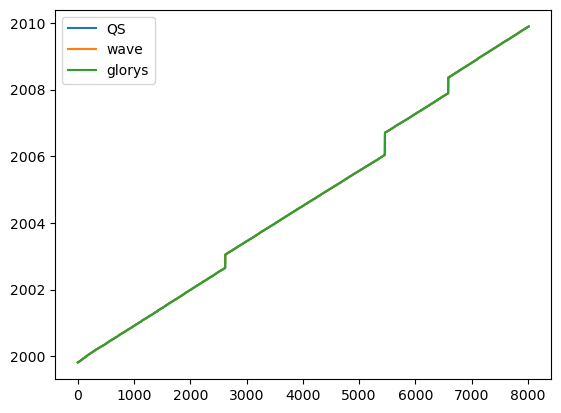

In [11]:
plt.plot(QS_TIME, label='QS')
plt.plot(WAVE_TIME, label='wave')
plt.plot(GLORYS_TIME, label='glorys')
plt.legend()

In [12]:
#wave_mask = np.
diff_wave = np.array([(QS_TIME[i] - WAVE_TIME[i]).astype('timedelta64[s]').astype(int) for i in range(len(QS_TIME))])

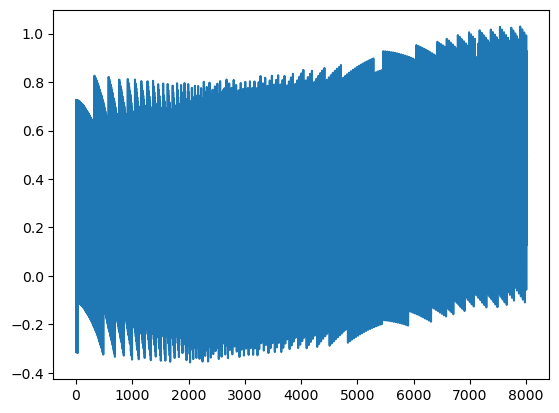

In [13]:
plt.plot(diff_wave/(3600))

In [14]:
wave_ds = xr.open_dataset('../../../downloads/oceanReanalysis/T_009S_095W_oceanReanalysis_xarr.nc')

In [15]:
wave_ds

<xarray.Dataset>
Dimensions:  (time: 8217)
Coordinates:
  * time     (time) datetime64[ns] 1999-01-01 1999-01-02 ... 2021-06-30
Data variables:
    vo       (time) float32 ...
    zos      (time) float32 ...
    uo       (time) float32 ...
    thetao   (time) float32 ...
    so       (time) float32 ...
Attributes:
    references:                http://www.mercator-ocean.fr
    Conventions:               CF-1.4
    source:                    MERCATOR GLORYS12V1
    institution:               MERCATOR OCEAN
    history:                   2023/06/01 16:20:05 MERCATOR OCEAN Netcdf crea...
    title:                     daily mean fields from Global Ocean Physics An...
    comment:                   CMEMS product
    copernicusmarine_version:  2.1.2

In [16]:
wave_time = wave_ds.time.to_numpy()

In [17]:
wave_time

array(['1999-01-01T00:00:00.000000000', '1999-01-02T00:00:00.000000000',
       '1999-01-03T00:00:00.000000000', ...,
       '2021-06-28T00:00:00.000000000', '2021-06-29T00:00:00.000000000',
       '2021-06-30T00:00:00.000000000'], dtype='datetime64[ns]')

In [18]:
diff_wave_time = np.array([(wave_time[i+1] - wave_time[i]).astype('timedelta64[s]').astype(int) for i in range(len(wave_time)-1)])

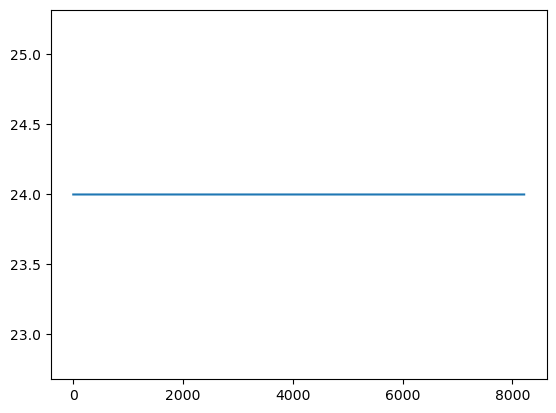

In [19]:
plt.plot(diff_wave_time/3600)